In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [23]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [25]:
# depending variable (output variable)

y = data.iloc[:, -1].values

In [26]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [28]:
# Encoding categorical data  (Geography	& Gender)

#1st Gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [29]:
# Geography
encoded_geo = pd.get_dummies(data['Geography'], drop_first = True)
encoded_geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [30]:
data = pd.concat([data.drop('Geography', axis=1), encoded_geo], axis=1)
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [31]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [32]:
data.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace=True)
data.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [33]:
# feature selection
# output (Exit)
y

array([1, 0, 1, ..., 1, 1, 0])

In [34]:
X = data.drop('Exited', axis=1).values

In [35]:
# split - 80 (training - input & output) : 20 (testing - input & output)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=23)

In [36]:
# Feature Scalling

from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Build ANN

3 Entities of ANN:
1. interconnection
2. Activation
3. learning rules

Neuron connection architectures:
1. Single Layer Feed-Farward-Network
2. Multi Layer Feed-Farward-Newtwork
3. Single Layer recurrent network
4. Multi Layer recurrent network

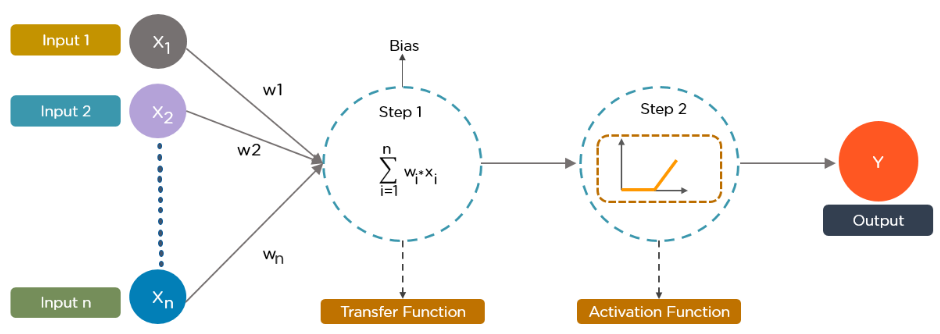

In [ ]:
# Activation Function :
1. Sigmoid (0 - 1) - output layer
2. Tanh - (-1 to 1) - output layer
3. ReLU  - inputlayer
4. Leaky ReLU - inputlayer
5. Softmax  - outputlayer

In [38]:
#load ANN - implementation packages:
from tensorflow.keras.models import Sequential # it wil create nn sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience=25)

In [40]:
X_train.shape

(8000, 11)

In [44]:
model = Sequential() # create model
#input layer
model.add(Dense(11, activation='relu'))

#hidden layers
model.add(Dense(11, activation='relu'))

#output layer
model.add(Dense(1, activation='sigmoid'))

In [45]:
#Complie all the layers

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# train
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5233 - accuracy: 0.7715 - val_loss: 0.4523 - val_accuracy: 0.8035
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.8029 - val_loss: 0.4186 - val_accuracy: 0.8145
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4254 - accuracy: 0.8121 - val_loss: 0.4048 - val_accuracy: 0.8265
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4117 - accuracy: 0.8261 - val_loss: 0.3932 - val_accuracy: 0.8335
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8369 - val_loss: 0.3795 - val_accuracy: 0.8385
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8447 - val_loss: 0.3675 - val_accuracy: 0.8490
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3710 - accuracy: 0.8510 - val_loss: 0.3588 - val_accuracy: 0.8530

In [50]:
X_test[1]

array([ 1.17994419, -1.08729708,  0.00278953,  1.37788382,  0.99419171,
       -0.91443711,  0.64084783, -1.02994825, -0.85924619,  1.73320628,
       -0.57677292])

In [47]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [51]:
pred1 = model.predict([[ 1.17994419, -1.08729708,  0.00278953,  1.37788382,  0.99419171,
       -0.91443711,  0.64084783, -1.02994825, -0.85924619,  1.73320628,
       -0.57677292]])
print(pred1)

1/1 [==============================] - 0s 100ms/step
[[0.4221025]]


In [49]:
y_pred

array([[0.07423227],
       [0.42210248],
       [0.98168105],
       ...,
       [0.10905269],
       [0.567884  ],
       [0.2364268 ]], dtype=float32)

In [53]:
y_pred = (y_pred>0.5)
y_pred[:5]

array([[False],
       [False],
       [ True],
       [False],
       [False]])

In [55]:
pred_df = {
    'Prediction' : list(y_pred),
    'True Y Test': list(y_test)
}

pred_df = pd.DataFrame(pred_df)
pred_df.head(10)

,Prediction,True Y Test
0,[False],0
1,[False],1
2,[True],1
3,[False],0
4,[False],0
5,[False],1
6,[False],0
7,[False],0
8,[False],0
9,[False],0


In [56]:
# model evluation

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1604
           1       0.75      0.46      0.57       396

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [57]:
print(confusion_matrix(y_test, y_pred))

[[1544   60]
 [ 214  182]]
